
# Simple AutoEncoders with Image Data

Here is a simple autoencoder with just the dense layers.

Load the data and import the libraries.

In [1]:
#
# Import relevant Librarie
#
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load MNIST data and store it in variables x_train, x_test. Note -  we do not need labels as it's autoencoder.
df = mnist.load_data()

(x_train, _), (x_test, _) = df

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

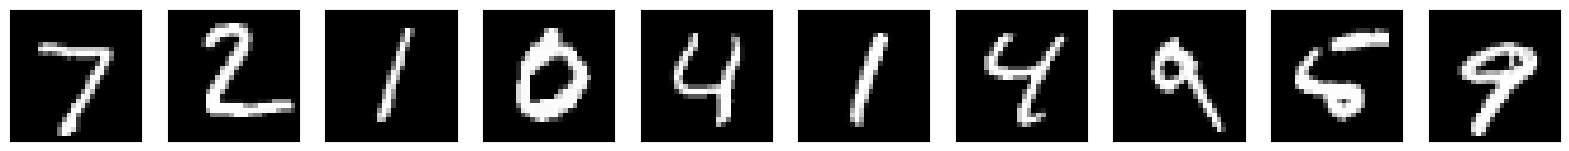

In [5]:
# Plot a few data points
%matplotlib inline

n = 10  # Number of records that will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [6]:
# Normalize train data - Divide by 255
# Normalize test data - Divide by 255
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.max()

1.0

In [8]:
x_test.max()

1.0

## Basic AutoEncoder

Build a basic symmetric encoder-decoder network that recreates the image.  This network could be used in dimensionaliry reduction or feature learning. 

In [9]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Reshape

In [10]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))

#
# Add as many hidden layers in the encoder network of your choise
#
#
encoder.add(Dense(392, activation = 'relu'))
encoder.add(Dense(196, activation='relu'))
encoder.add(Dense(98, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))
# The last TWO layers of the encoder and decoder must be matched (see the following decoder cell.
#

In [11]:
# print the encoder model
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 392)               307720    
                                                                 
 dense_1 (Dense)             (None, 196)               77028     
                                                                 
 dense_2 (Dense)             (None, 98)                19306     
                                                                 
 dense_3 (Dense)             (None, 50)                4950      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
Total params: 410279 (1.57 MB)
Trainable params: 410279 

In [12]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add as many layers in the decoder as you want. Reember - Encoder and decoder need to be symmetric.
#
decoder.add(Dense(98, activation = 'relu'))
decoder.add(Dense(196, activation = 'relu'))
decoder.add(Dense(392, activation = 'relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [13]:
# print the decoder model
decoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                1300      
                                                                 
 dense_6 (Dense)             (None, 98)                4998      
                                                                 
 dense_7 (Dense)             (None, 196)               19404     
                                                                 
 dense_8 (Dense)             (None, 392)               77224     
                                                                 
 dense_9 (Dense)             (None, 784)               308112    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 411038 (1.57 MB)
Trainable params: 41103

In [14]:
autoencoder = Sequential([encoder, decoder]) # Combine encoder and decoder together.


In [15]:
# print the autoencoder model
autoencoder.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 25)                410279    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            411038    
                                                                 
Total params: 821317 (3.13 MB)
Trainable params: 821317 (3.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
# Compile the autoencoder. Use binary_crossenropy as loss and metrics as accuracy.
autoencoder.compile(loss='binary_crossentropy', metrics='accuracy')

In [17]:
# Fit the autoencoder. Note - Input and output are same. x_train is your train data, x_test is your validation data.
autoencoder.fit(x_train, x_train, validation_data=[x_test, x_test], epochs = 30)

Epoch 1/30


1875/1875 [==============================] - 10s 5ms/step - loss: 0.2319 - accuracy: 0.1100 - val_loss: 0.1895 - val_accuracy: 0.1585
Epoch 2/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1675 - accuracy: 0.1885 - val_loss: 0.1524 - val_accuracy: 0.2025
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1492 - accuracy: 0.2113 - val_loss: 0.1415 - val_accuracy: 0.2203
Epoch 4/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1397 - accuracy: 0.2255 - val_loss: 0.1344 - val_accuracy: 0.2252
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1320 - accuracy: 0.2345 - val_loss: 0.1276 - val_accuracy: 0.2332
Epoch 6/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1272 - accuracy: 0.2400 - val_loss: 0.1239 - val_accuracy: 0.2423
Epoch 7/30
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1232 - accuracy: 0.2459 - val_loss: 0.1197 - val_accu

313/313 [==============================] - 1s 2ms/step


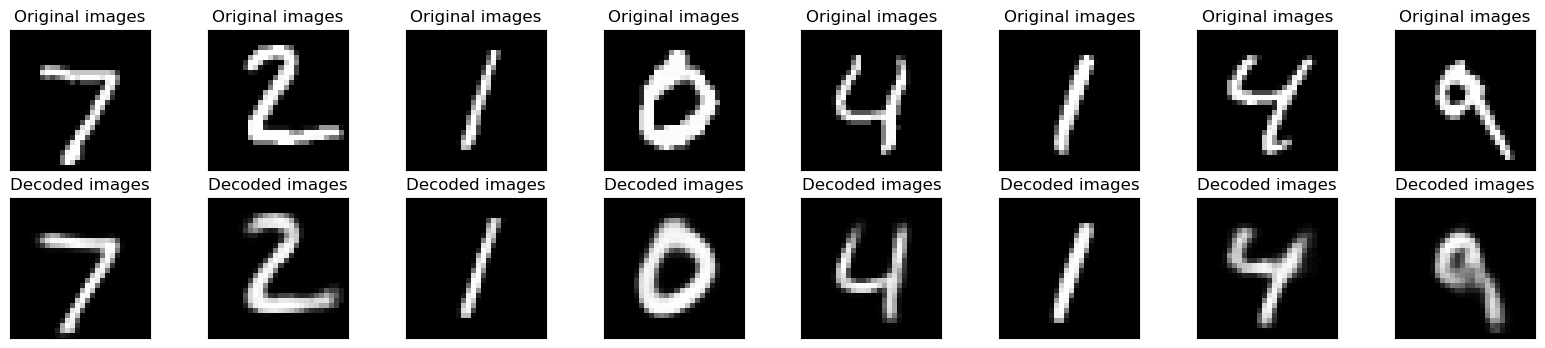

In [39]:
# Check a few sample images.
decoded_imgs = autoencoder.predict(x_test)

n = 8

plt.figure(figsize=(20, 4))

for i in range(n):
    # 
    # Display original image - Just line sample code provided earlier.
    #
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Original images')
    
    # 
    # Display reconstruced (decoded) images. You need to slightly change your code.
    #
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('Decoded images')

plt.show()

# AutoEncoders for Denoising Images

Use the same digit data set. Add Gaussian noise to it to train an autoencoder that removes noise. Test the noisy samples. 

In [19]:
from tensorflow.keras.layers import GaussianNoise

In [20]:
sample = GaussianNoise(0.2)
noisey = sample(x_test[0:2],training=True)

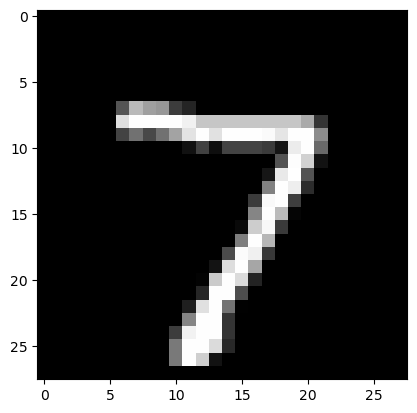

In [21]:
plt.imshow(x_test[0])

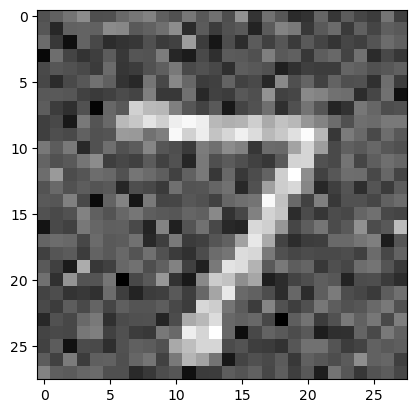

In [22]:
plt.imshow(noisey[0])

### Create  noise removal autoencoder and train it.

# Input - Images with noise
# Labels - Clean images.

In [23]:

encoder = Sequential()
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(GaussianNoise(0.2)) # We are adding noise to make input as noisy image
#
# Add layers of encoder network. You could use same number of layers as earlier.
#
encoder.add(Dense(392, activation = 'relu'))
encoder.add(Dense(196, activation='relu'))
encoder.add(Dense(98, activation = 'relu'))
encoder.add(Dense(50, activation = 'relu'))
encoder.add(Dense(25, activation = 'relu'))


In [24]:
decoder = Sequential()
decoder.add(Dense(50,input_shape=[25],activation='relu'))

#
# Add layers of decoder network. You could use same number of layers as earlier.
#
decoder.add(Dense(98, activation = 'relu'))
decoder.add(Dense(196, activation = 'relu'))
decoder.add(Dense(392, activation = 'relu'))

decoder.add(Dense(28 * 28, activation="sigmoid"))
decoder.add(Reshape([28, 28]))

In [25]:
noise_remover = Sequential([encoder, decoder])

In [26]:
# Compile the network as earlier
noise_remover.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [27]:
# Fit the network as earlier.
noise_remover.fit(x_train, x_train, validation_data=[x_test, x_test], epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 12s 5ms/step - loss: 0.1713 - accuracy: 0.1824 - val_loss: 0.1379 - val_accuracy: 0.2241
Epoch 2/30
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1309 - accuracy: 0.2319 - val_loss: 0.1222 - val_accuracy: 0.2392
Epoch 3/30
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1222 - accuracy: 0.2461 - val_loss: 0.1170 - val_accuracy: 0.2514
Epoch 4/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1173 - accuracy: 0.2540 - val_loss: 0.1104 - val_accuracy: 0.2600
Epoch 5/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1131 - accuracy: 0.2602 - val_loss: 0.1078 - val_accuracy: 0.2595
Epoch 6/30
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1104 - accuracy: 0.2645 - val_loss: 0.1064 - val_accuracy: 0.2691
Epoch 7/30
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1084 - accuracy: 0.2683 - val_loss: 0.1034 - val_ac

In [28]:
ten_noisey_images = sample(x_test[0:10],training=True)
denoised = noise_remover(ten_noisey_images[0:10])

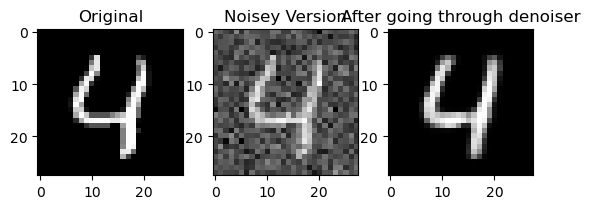

In [30]:
n = 4
plt.subplot(1, 3, 1)
plt.imshow(x_test[n])
plt.title("Original")

plt.subplot(1, 3, 2)
plt.imshow(ten_noisey_images[n])
plt.title("Noisey Version")

plt.subplot(1, 3, 3)
plt.imshow(denoised[n])
plt.title("After going through denoiser")

plt.show()

## Lab Logbook requirement:

- Put the model summary for task 1 in you lab logbook.

Ensure that no code or other information is added to the logbook and that only required information is present.  Marks will not be awarded if anything else is found in the logbook or instructions are not clearly followed.

NOTE: DON'T FORGET TO SAVE AND BACK UP YOUR COMPLETED JUPYTER NOTEBOOK AND LAB LOGBOOK ON GITHUB OR ONEDRIVE.